# Dekompozycja macierzy

### Wartości własne

In [105]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
import time
from scipy.sparse.linalg import eigs
from scipy.linalg import lu_factor, lu_solve

### Power method

In [79]:
# power iterations method
def dominant_eigenvalue_eigenvector(A: np.ndarray, max_iter: int = 1000, epsilon: float = 10**-10) -> Tuple[np.float64, np.ndarray]:
    n: int = A.shape[0]
    result: np.ndarray = np.ones(n)
    prev_result:np.ndarray = np.zeros(n)
    dominant_eigenvalue: float = 0
        
    iter_count = 0
    while iter_count < max_iter and np.linalg.norm(prev_result - result) > epsilon:
        prev_result = result
        result = A @ result
        dominant_eigenvalue = np.abs(result).max()
        result = result / dominant_eigenvalue
        iter_count += 1 
        
    print(iter_count, np.linalg.norm(prev_result - result))
    return dominant_eigenvalue, result / np.linalg.norm(result)

In [80]:
# examples
arr = np.array([[2, 0, 0],
               [0, 3, 4],
               [0, 4, 9]])

In [81]:
dominant_eigenvalue_eigenvector(arr)

15 2.9416495039891334e-11


(11.000000000000004, array([5.84686956e-12, 4.47213595e-01, 8.94427191e-01]))

In [94]:
N = 1001
jump = 100

custom_times = []
lib_times = []

for n in range (100, N, jump):
    print(n, end=' ')
    A = np.random.rand(n,n)
    # custom
    start = time.time()
    dom1 = dominant_eigenvalue_eigenvector(A)[0]
    custom_times.append(time.time() - start)
    
    # library function
    start = time.time()
    dom2 = eigs(A, k = 1, which = 'LM')[0]
    lib_times.append(time.time() - start)
    
    assert np.abs(dom1 - dom2) < 10**-6

100 10 4.834831301830572e-12
200 9 6.085075144546989e-12
300 8 2.4443775183697246e-11
400 8 7.407939838305671e-12
500 8 4.8062650815505385e-12
600 7 8.679208196655037e-11
700 7 9.030030672374505e-11
800 7 3.701513791946543e-11
900 7 3.2745285346376714e-11
1000 7 4.14604135826033e-11


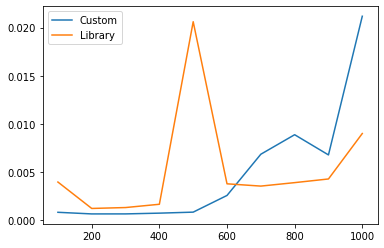

In [95]:
plt.plot(list(range (100, N, jump)), custom_times, label = "Custom")
plt.plot(list(range (100, N, jump)), lib_times, label = "Library")
plt.legend(loc="upper left")
plt.show()

**Wniosek:** liczenie wszystkich wartości jest bez sensu, nawet jeśli używamy numpy

### Inverse power method

In [123]:
# power iterations method
def inverse_power_method(A: np.ndarray, max_iter: int = 1000, epsilon: float = 10**-10) -> Tuple[np.float64, np.ndarray]:
    # create initial guess by one iteration of plain power method
    n: int = A.shape[0]
    power_result: np.ndarray = np.ones(n)
    dominant_eigenvalue: float = 0
    power_result = A @ power_result
    dominant_eigenvalue = np.abs(power_result).max()
    power_result = power_result / dominant_eigenvalue
    
    # auxillary matrix
    B = np.linalg.inv(A - dominant_eigenvalue * np.identity(n))
#     lu, piv = lu_factor(B)
    
    result: np.ndarray = np.ones(n)
    prev_result: np.ndarray = np.zeros(n)
    iter_count = 0
    while iter_count < max_iter and np.linalg.norm(prev_result - result) > epsilon:
        prev_result = result
        result = B @ result
        dominant_eigenvalue = np.abs(result).max()
        result = result / dominant_eigenvalue
        iter_count += 1 
        
    print(iter_count, np.linalg.norm(prev_result - result))
    return dominant_eigenvalue, result / np.linalg.norm(result)


In [124]:
N = 1001
jump = 100

plain_times = []
inv_times = []

for n in range (100, N, jump):
    A = np.random.rand(n,n)
    
    print(n, end=' ')
    # plain
    start = time.time()
    dom1 = dominant_eigenvalue_eigenvector(A)[0]
    plain_times.append(time.time() - start)
    
    print(n, end=' ')
    # inv 
    start = time.time()
    dom2 = inverse_power_method(A)[0]
    inv_times.append(time.time() - start)
    
#     print(dom1, dom2)
    assert np.abs(dom1 - dom2) < 10**-6

100 9 5.718421282914507e-11
100 1000 17.54955962127968


AssertionError: 

In [ ]:
plt.plot(list(range (100, N, jump)), plain_times, label = "Plain power method")
plt.plot(list(range (100, N, jump)), inv_times, label = "Inverse power method")
plt.legend(loc="upper left")
plt.show()